# Random Forrest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

## Data

In [3]:
breast_cancer = pd.read_csv('../Data/breast_cancer.csv')
breast_cancer.drop(['id'], axis=1, inplace=True)
breast_cancer_dummies = pd.get_dummies(breast_cancer, columns=['diagnosis'], drop_first=True)
breast_cancer_dummies.rename(columns={'diagnosis_M': 'Malignant'}, inplace=True)
breast_cancer_dummies.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
inputs = breast_cancer_dummies.iloc[:,:-1]
target = breast_cancer_dummies.Malignant

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)

## Random Forrest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
random_forrest = RandomForestClassifier()
random_forrest.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
random_forrest.score(X_train, y_train), random_forrest.score(X_test, y_test)

(1.0, 0.9736842105263158)

## Feature Importance

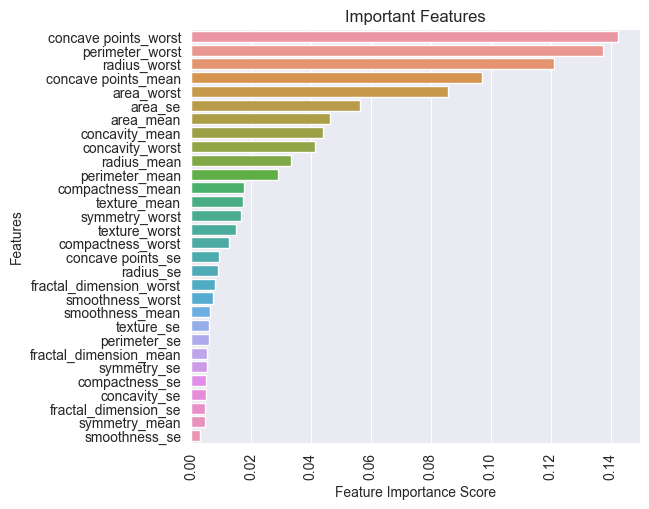

In [8]:
feature_labels = inputs.columns
feature_imp = pd.Series(random_forrest.feature_importances_,index=feature_labels).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

## Tuning the Random Forrest
When we instantiated RandomForrest(), we used the default arguments e.g number of trees, leaves etc. We will tune these parameters using a random grid search.

We define a range of values from which the code can randomly pick and choose until it finds a set that performs the best



In [9]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
# random_grid = {'n_estimators': n_estimators,
#                #                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap,
#                'criterion': criterion}
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [10]:
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=3,
                               random_state=42, n_jobs = 4)

In [11]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=3)

In [12]:
rf_random.best_params_

{'n_estimators': 1135,
 'min_samples_leaf': 1,
 'criterion': 'entropy',
 'bootstrap': False}

In [13]:
rf_random.score(X_train, y_train), rf_random.score(X_test, y_test)

(1.0, 0.9824561403508771)

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1130, 1135, 1140],
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid,
                              cv = 5, n_jobs = 8, verbose = 3)
grid_rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=8,
             param_grid={'max_depth': [170, 180, 190, 200, 210, 220],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1130, 1135, 1140]},
             verbose=3)

In [19]:
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 200,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1140}

In [20]:
grid_rf_search.score(X_train, y_train), grid_rf_search.score(X_test, y_test)

(0.9956043956043956, 0.9824561403508771)